# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

In [142]:
import numpy as np
import pandas as pd

In [143]:
df = pd.read_csv('/content/moviereviews.csv')

In [144]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [145]:
#CODE HERE
df.isnull().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [146]:
df.dropna(axis=0,inplace=True)

In [147]:
df.isnull().sum()

label     0
review    0
dtype: int64

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [148]:
import re
empty=[]
for i in range(len(df)):
  sentence = re.sub(r"\s+", "", df['review'].iloc[i], flags=re.UNICODE)
  if (sentence == "") | (sentence == ""):
    empty.append(i)
  else:
    continue

In [149]:
len(empty)

27

In [150]:
label0=[]
review0=[]
for i in empty:
  label0.append(df['label'].iloc[i])
  review0.append(df['review'].iloc[i]) 

In [151]:
Empty=pd.DataFrame(list(zip(empty,label0,review0 )), columns =["index","label","review"]) 
Empty

,index,label,review
0,57,neg,
1,71,pos,
2,146,pos,
3,150,pos,
4,280,pos,
5,304,pos,
6,310,neg,
7,320,pos,
8,339,pos,
9,347,neg,


In [153]:
df = df[~df['review'].str.isspace()] 

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [155]:
df['review'].str.isspace().sum()

0

**TASK: Confirm the value counts per label:**

In [156]:
#CODE HERE
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [157]:
#CODE HERE
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')


In [162]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [164]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [165]:
#CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
cv= TfidfVectorizer()
A = cv.fit_transform(df)

In [166]:
y = df['label']
X = df['review']

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [180]:
#CODE HERE
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [181]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [182]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [183]:
from sklearn.metrics import plot_confusion_matrix,classification_report
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

NB MODEL
              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


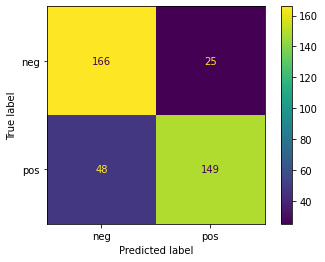

In [184]:
print("NB MODEL")
report(nb)


Logistic Regression
              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


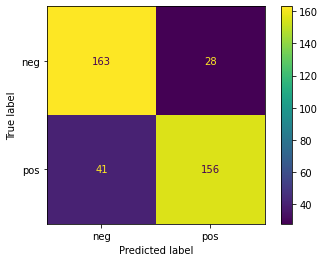

In [185]:
print("Logistic Regression")
report(log)


SVC
              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


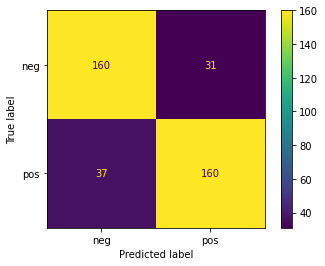

In [186]:
print('SVC')
report(svc)

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [199]:
#CODE HERE
# best model LinearSVC
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
pipe.fit(df['review'],df['label'])


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [200]:
preds = pipe.predict(X_test)
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

         neg       1.00      1.00      1.00       191
         pos       1.00      1.00      1.00       197

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


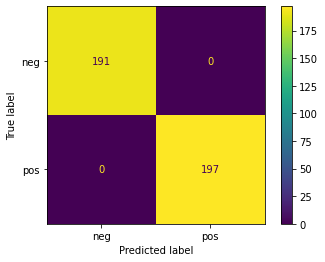

In [201]:
plot_confusion_matrix(pipe,X_test,y_test)

In [202]:
new_review = ['good flight']
pipe.predict(new_review)

array(['pos'], dtype=object)

## Great job!